# Frequencies

function counts accepts a vector data and calculates the number of times each value in data occurs.

In [1]:
function counts(data)
    dict = Dict{Int, Int}()
    for i in 1:length(data)
        if haskey(dict, data[i])
            dict[data[i]] += 1
        else
            dict[data[i]] = 1
        end
    end
    
    return dict
end

counts (generic function with 1 method)

In [2]:
dat = [1, 0, 1, 0, 1000, 1, 1, 1000]

8-element Vector{Int64}:
    1
    0
    1
    0
 1000
    1
    1
 1000

In [3]:
counts(dat)

Dict{Int64, Int64} with 3 entries:
  0    => 2
  1000 => 2
  1    => 4

In [5]:
sol = counts(dat);

In [6]:
ks = collect(keys(sol))
vs = collect(values(sol))

3-element Vector{Int64}:
 2
 2
 4

In [7]:
p = sortperm(ks)

3-element Vector{Int64}:
 1
 3
 2

In [8]:
ks[p]

3-element Vector{Int64}:
    0
    1
 1000

In [9]:
vs[p]

3-element Vector{Int64}:
 2
 4
 2

The dictionary contains the information as a sequence of pairs mapping keys to values. This is not a particularly useful form for us. Instead we would prefer a vector of the keys and a vector of the values, sorted in order of the key.

In [11]:
function counts(data)
    dict = Dict{Int, Int}()
    
    for i in 1:length(data)
        if haskey(dict, data[i])
            dict[data[i]] += 1
        else
            dict[data[i]] = 1
        end
    end
    
    ks = collect(keys(dict))
    vs = collect(values(dict))
    
    p = sortperm(ks)
    
    return ks[p], vs[p]
end

counts (generic function with 1 method)

In [12]:
counts(dat)

([0, 1, 1000], [2, 4, 2])

function probability_distribution normalizes the result of counts to calculate the relative frequency, i.e. to give a probability distribution

In [13]:
function probability_distribution(data)
    a, b = counts(data)
    b = b ./ sum(b)
    return a, b
end

probability_distribution (generic function with 1 method)

In [14]:
probability_distribution(dat)

([0, 1, 1000], [0.25, 0.5, 0.25])

# Modelling Recovery

We will investigate the simple model of recovery from an infection, we want to study the time $\tau$ to recover.

In [15]:
function bernoulli(p)
    return rand() < p
end

bernoulli (generic function with 1 method)

In [16]:
bernoulli(0.25)

false

In [17]:
function geometric(p)
    n = 0
    while !bernoulli(p)
        n += 1
    end
    
    return n
end

geometric (generic function with 1 method)

In [18]:
geometric(0.25)

1

In [19]:
function experiment(p, N)
    data = [geometric(p) for i in 1:N]
    
    return data
end

experiment (generic function with 1 method)

In [20]:
experiment(0.25, 10)

10-element Vector{Int64}:
  2
  2
  3
  0
  5
 20
  4
 10
  3
  2

In [21]:
data = experiment(0.25, 10_000);

In [22]:
using Plots

In [23]:
n, p = probability_distribution(data);

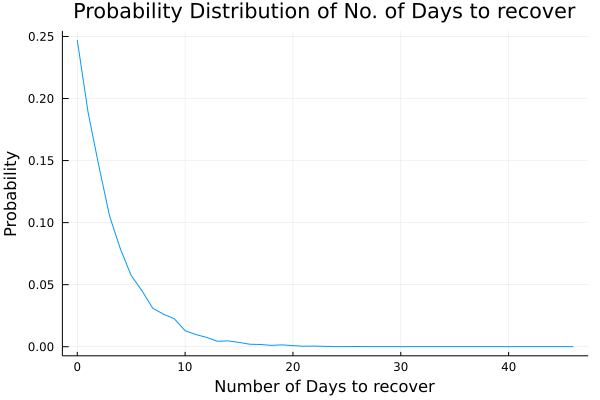

In [24]:
plot(n, p, xlabel="Number of Days to recover", ylabel="Probability", title="Probability Distribution of No. of Days to recover", leg=false)

In [25]:
using Statistics

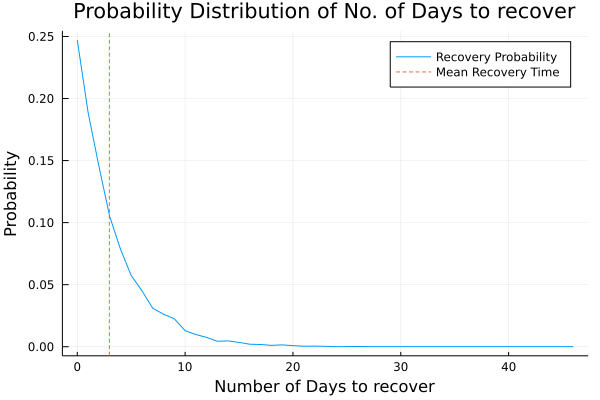

In [26]:
plot(n, p, xlabel="Number of Days to recover", ylabel="Probability", title="Probability Distribution of No. of Days to recover", leg=:topright, label="Recovery Probability")
vline!([mean(data)], ls=:dash, label="Mean Recovery Time")

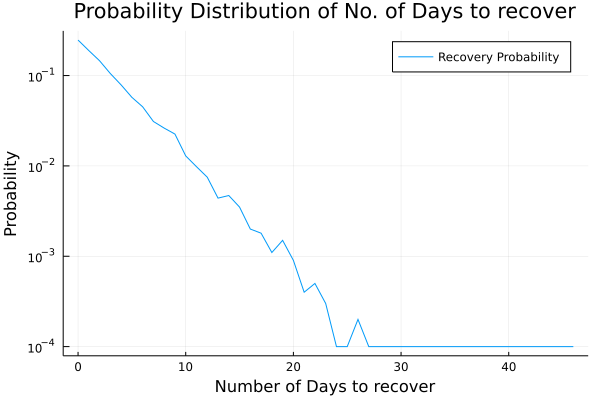

In [27]:
plot(n, p, xlabel="Number of Days to recover", ylabel="Probability", title="Probability Distribution of No. of Days to recover", leg=:topright, label="Recovery Probability", yscale=:log10)

In [28]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-14799854725936622392\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-16308891707977733658\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-14799854725936622392\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [29]:
@manipulate for p in 0:0.01:1, N in 0:100_000
    data = experiment(p, N)
    n, p = probability_distribution(data)
    plot(n, p, xlabel="Number of Days to recover", ylabel="Probability", title="Probability Distribution of No. of Days to recover", leg=:topright, label="Recovery Probability")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["p"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 101, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
51, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\InteractBase\\Zfu5P\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\Abhishek Bhatt\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000019759460, Task (runnable) @0x0000000019759460), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.0\",\"0.01\",\"0.02\",\"0.03\",\"0.04\",\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"

## Average Time steps for recovery vs probability

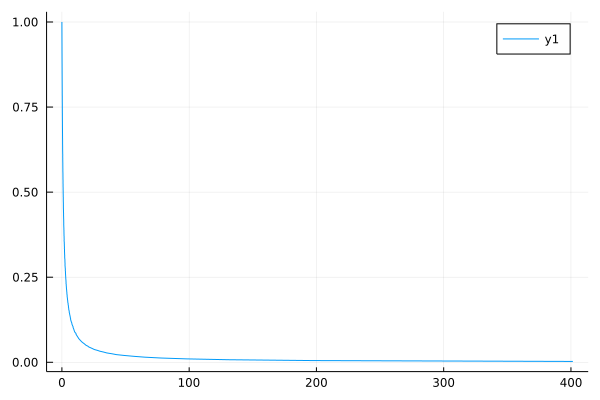

In [30]:
N = 10^4

avgs = [mean(experiment(p, N)) for p in 0.0025:0.0025:1]
plot(avgs, 0.0025:0.0025:1)

# More Efficient Geometric Distributions

**$P(n) = P(\tau = n)$**

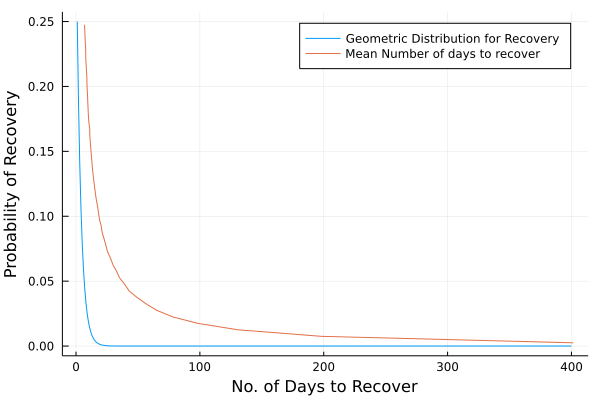

In [31]:
p = 0.25

p_n = [p*(1-p)^(n-1) for n in  1:400]
plot(xlabel="No. of Days to Recover", ylabel="Probability of Recovery")
plot!(p_n, label="Geometric Distribution for Recovery")
plot!(avgs[1:50], 0.0025:0.005:0.25, label="Mean Number of days to recover")

The distance between the two curves decreases as n increases

In [32]:
n_list = [i for i in 1:50]
p_list = [p*(1-p)^(n-1) for n in n_list]

50-element Vector{Float64}:
 0.25
 0.1875
 0.140625
 0.10546875
 0.0791015625
 0.059326171875
 0.04449462890625
 0.0333709716796875
 0.025028228759765625
 0.01877117156982422
 0.014078378677368164
 0.010558784008026123
 0.007919088006019592
 ⋮
 4.4695934051722205e-6
 3.3521950538791656e-6
 2.514146290409374e-6
 1.8856097178070307e-6
 1.414207288355273e-6
 1.0606554662664546e-6
 7.95491599699841e-7
 5.966186997748808e-7
 4.474640248311606e-7
 3.3559801862337043e-7
 2.5169851396752785e-7
 1.8877388547564587e-7

In [33]:
function cumulative_sum(input_list)
    cur_sum = 0
    output_list = collect(input_list)
    
    for (cur_index, cur_value) in enumerate(output_list)
        cur_sum += cur_value
        output_list[cur_index] = cur_sum
    end
    
    return output_list
end

cumulative_sum (generic function with 1 method)

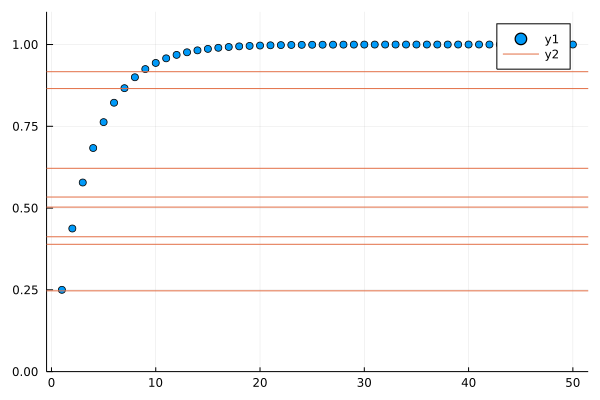

In [34]:
scatter(n_list,cumulative_sum(p_list))
hline!(rand(8))
ylims!(0, 1.1)

Now we find the sum from $ P_1 to P_n $

$S_n = P_1 + P_2 + ....+P_n = \sum p(1-p)^{n-1} = p \sum (1 - p)^{n-1} = p((1-(1-p)^n)/p) = 1 - (1 - p)^n$

From Sum of finite Geometric Progression

### To find n from given r

We know that, $P_{n-1} \le r < P_n$ so that r falls in the bin extending from $P_{n-1} to P_n$

So, $floor(r) = S_n$

$r = 1 - (1 - p)^n $

or, $(1-r) = (1-p)^n$
However, **`n`** is an int defined at right end of interval, so:

> $ n = 1 + \left\lfloor \frac{log(1-r)}{log(1-p)} \right\rfloor $

In [35]:
p = 0.25

find_n(r, p)  = 1 + Int(floor(log(1-r)/log(1-p)))

for _ in 1:10
    r = rand()
    n = find_n(r, p)
    println("$r => $n")
end

0.6342952804272566 => 4
0.13320922798680557 => 1
0.07789036193734011 => 1
0.4814043130915422 => 3
0.6077238297990368 => 4
0.31780878879517416 => 2
0.33622606244646125 => 2
0.6348636842266293 => 4
0.024186877238814297 => 1
0.9994177678390734 => 26


# A simple infection model

The model is as follows: An individual starts in state S ("susceptible"). When they are in state S, they have a probability $p_E$ to become exposed (state E) at each step. Once they are exposed, they have probability $p_I$ to become infectious (state I). When they are infectious, they have a probability $p_R$ to recover at each step.

Let's denote by $\tau_S$ the length of time spent in state S, and similarly for $\tau_E$ and $\tau_I$.

How does the total time $\tau_\text{total}$ to go from S to R relate to these times? What is the relation with the geometric random variables from the previous exercises?

> **$A: \tau_{total} = \tau_S + \tau_E + \tau_I$**

In [36]:
# Function to calculate total time spent going from S -> R
function total_time(p_E, p_I, p_R)
    total = geometric(p_E) + geometric(p_I) + geometric(p_R)
    return total
end

total_time (generic function with 1 method)

## Monte Carlo simulation to calculate and plot the probability distribution of $\tau_\text{total}$ for $p_E = 0.25$, $p_I = 0.1$ and $p_R = 0.05$

In [37]:
p_E = 0.25
p_I = 0.1
p_R = 0.05

N = 10^4

data = [total_time(p_E, p_I, p_R) for i in 1:N];

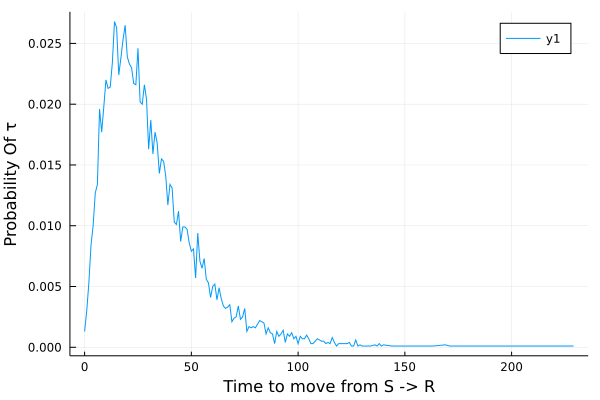

In [38]:
τ, p = probability_distribution(data)

plot(τ, p, xlabel="Time to move from S -> R", ylabel="Probability Of τ")

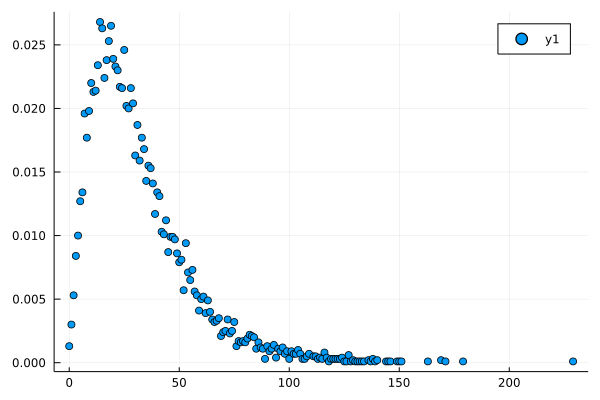

In [39]:
# Actually Discrete Data is correctly visualized through scatter plot
scatter(τ, p)

We will model the spread of an infection or rumour in which there is no recovery via a stochastic model, which we will implement in a Monte Carlo simulation.